# Introduction

In this notebook, we provide an intuitive introduction to the foundations of neural networks.

**Take-aways:**
By the end of this notebook, you will have seen:
- how biological brains inspired the development of artificial neural networks;
- how multi-layer perceptrons (MLPs) provide the backbone of all modern neural networks;
- and how MLPs can approximate any function (universal function approximation theorem).

In [131]:
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
sns.set_theme()

# 1. The Perceptron

Intuitively, one might expect artificial intelligence (AI) to arise when models of the human brain are simulated on a computer. This intuition motivated the development of artificial neural networks more than 60 years ago. These artificial neural networks are now at the core of all modern AI models. In this notebook, we will retrace these early developments of artificial intelligence to better understand why language models, such as GPT3, process language the way they do.

The smallest building block of brains are brain cells, also known as neurons. Each neuron by itself is not more intelligent than any other cell in our body. But the human brain is composed of approximately 100 billion neurons which communicate with each other and process information in a coordinated way. This leads to the emergence of intelligence. A good start for artificial intelligence is therefore to first build a model of a neuron, and then make many of those neurons communicate in the hope to see artificial intelligence to emerge in a similar way to biological neural networks.

In the figure below, we illustrate a human neuron in the left panel. The right panel shows a model of the neuron: an artificial neuron, commonly referred to as *perceptron*. The biological neuron consists of a junction of dendrites with the cell nucleus in the middle, and an axon leading away from the neuron. The one ability of neurons that is widely believed to make the emergence of intelligence possible is their ability to receive electrical signals through the dendrites and forward strong enough signals to other neurons along their axons. The perceptron emulates this behaviour by receiving $n$ input signals $x_1, \ldots, x_n$ which are processed into one output signal $y$.

<img src="biological-neuron.jpg" width="500" style="display: block; margin: 0 auto" >

More specifically, we may define a perceptron using a combination of the weighted sum of the input signals, and a step function that only returns a value of $1$ when the weighted sum is greater than zero 

$$
y = f(x, w) = \Theta (w_0\, x_0 + \ldots + w_n\, x_n),
$$
where $\Theta(z) = 1$ for $z>0$ and $\Theta(y) = 0$, otherwise. This activation function, $\Theta(z)$, mimics the behaviour of neurons to only forward signals if the incoming signals are large enough.

### Task 1: Implement a simple artificial neuron

To familiarise yourselfves with how perceptrons process information, implement a perceptron by completing the code block below. When you are ready, use the following notebook cell to test your implementation.

In [2]:
def perceptron(x):
    """
    Returns the output of a perceptron with 6 input signals.

    Parameters:
        x (List of length 6) Input signals to the perceptron.
    """
    weights = [0.2, -0.3, 0.9, 0.4, -0.9, -0.5]

    # TODO: Calculate y
    z = np.sum(np.array(weights) * np.array(x))

    # Calculate activation
    if z > 0:
        return 1

    return 0

<span style="color: red;">TODO:</span> Can you please implement some simple checks of the solutions where the function is checked against the correct outputs? Last time I did this for example by pre-implementing the correct solution in a module, see In [6] in https://github.com/equinor/edc2023-optimising-wind-farms/blob/main/03_wind_farm_model/solution.ipynb.

In [ ]:
# Solution

## 2 From single perceptrons to networks of perceptrons

Without activation functions, single perceptrons are mathematically equivalent to linear regression models (which have been used in the machine learning community for already for a very long time)

$$
    z = \sum _{j=1}^n w_j x_j.
$$

For just two inputs, this makes it possible to visualise the outputs of perceptrons for different input values using straight lines in a plane, see below. Note that it is convential to consider $x_0$ to be fixed to one, $x_0=1$. This enables translations of the lines in the plane. The corresponding weight, $w_0$, is commonly referred to as the bias of the perceptron. 

<img src="linear_classifier.png" width="500" style="display: block; margin: 0 auto">

The interpretation of perceptrons as binary linear regressors, i.e. linear classifiers, makes intuitively clear how the smallest building blocks of artificial neural networks process information. But one perceptron alone is limited in what it can do and certainly does not achieve artificial "intelligence".

To visualise the limitations of a single perceptron, we attempt a simple 2-dimensional classification task using the perceptron.

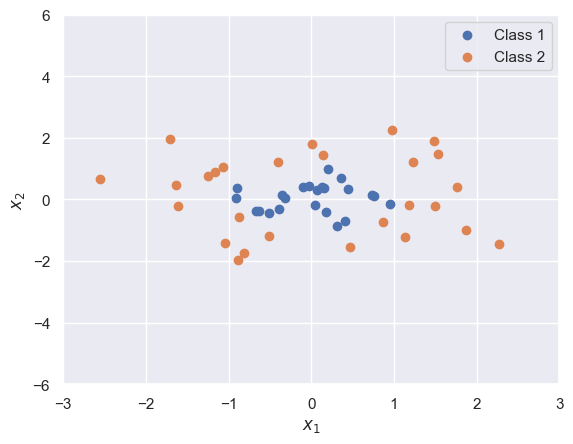

In [37]:
# Generate random data
np.random.seed(0)
n_samples = 50
X = np.random.randn(n_samples, 2)
y = np.zeros(n_samples)
y[np.linalg.norm(X, axis=1) > 1] = 1

# Plot the data
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 1')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 2')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

Here, the task for the perceptron is to classify the points based on the $x_1$ and $x_2$ coordinates. It is clear that we will not be able to use just a single line to separate the blue dots from the orange dots. But, we could, perhaps, use 4 perceptrons to classify the data...

### Task 2: Find 4 perceptrons that can jointly classify the data points
For example, you could decide that a data point is classified as "blue" if all perceptrons return a 1. Otherwise the data point is classified as orange. You can use the below code block to define the weights of the perceptrons, and the code block after that to visualise their decision boundaries.

In [59]:
# TODO
perceptron1 = {
    'bias': -2,
    'weight1': 2,
    'weight2': 1
}
perceptron2 = {
    'bias': -2,
    'weight1': -1,
    'weight2': 2
}
perceptron3 = {
    'bias': -2,
    'weight1': -2,
    'weight2': -1
}
perceptron4 = {
    'bias': -3,
    'weight1': 2,
    'weight2': -2
}

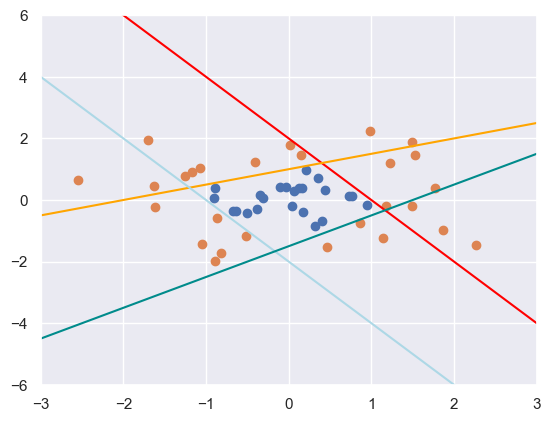

In [60]:
# Plot the data
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# linear classifications
x1 = np.linspace(-3, 3, 100)
x2 = -(perceptron1['weight1'] * x1 + perceptron1['bias']) / perceptron1['weight2']
plt.plot(x1, x2, linestyle='-', color='red')

x2 = -(perceptron2['weight1'] * x1 + perceptron2['bias']) / perceptron2['weight2']
plt.plot(x1, x2, linestyle='-', color='orange')

x2 = -perceptron3['weight1'] / perceptron3['weight2'] * x1 - perceptron3['bias'] / perceptron3['weight2']
plt.plot(x1, x2, linestyle='-', color='lightblue')

x2 = -perceptron4['weight1'] / perceptron4['weight2'] * x1 - perceptron4['bias'] / perceptron4['weight2']
plt.plot(x1, x2, linestyle='-', color='darkcyan')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()

This exercise demonstrates that networks of artificial neurons can perform more complex tasks than single perceptrons. The figure below illustrates this network diagrammatically.

<img src="complex_classifier_perceptron_diagram.png" width="1000" style="display: block; margin: 0 auto">

However, so far our neural network does not feel very "intelligent". It can only classify points in a plane, and we had to painfully tweak the weights of the network to do it. More complex networks are able to perform more complex tasks (modern neural networks, such as the lage language models GPT3 and Llama, have up to 200 billion model weights), but we need to find a way to avoid manually tweaking the weights of network networks.

## 3 Training neural networks

The automatic tweaking of neural network weights is achieved using numerical optimisation algorithms and is referred to as "training" or as "learning" in the AI community. While "training" and "learning" sounds fancy, the high level concept of automatically tweaking network weights to optimise an objective is quite intuitive...

### Task 3: Discuss in your group an iterative 3-step algorithm that can optimise neural network weights algorithmically

Do not spend more than 10 minutes to sketch out the algorithm.

Complete the below algorithm:

For step in steps:

1. Do ... Propose weights

2. Do ... Evaluate objective

3. Do ... Accept or reject weights


Did you come across any numerical optimisers before?

A simple, though not very efficient way to train neural networks is to repeatedly sample random weights from a distribution of possible model weights and test whether any of them satisfy our objective using an objective function. In this case, the objective is to classify all points in the dataset correctly. So, the network should assign blue points with the class label "0" and orange points with the class label "1". A simple metric to quantify how well our network does this is to simply count the number of points that the network classifies incorrectly for a given set of model weights

$$
\text{Loss}(w) = \sum _{j=1}^n y_j(1-f(x_i, w)) + \sum _{j=1}^n (1 - y_j)f(x_i, w).
$$

The optimisation algorithm would then be to repeatedly 1. sample model parameters; 2. evaluate the objective function / loss for those model parameters; and 3. accept the model parameters if the loss is lower than before.

### Task 4: Implement the objective function / loss function
You can use the implementation of the neural network below. Use the pre-implemented checks to test your solution. 

In [72]:
def perceptron(inputs, weights):
    """
    Returns the output of a perceptron with 3 input signals.

    Parameters:
        inputs (np.ndarray of shape (2, n)) Input data.
        weights (np.ndarray of shape (3,)) Weights of the network.
    """
    # Calculate linear output
    z = weights[0] + weights[1] * inputs[0] + weights[2] * inputs[1]

    # Calculate activation
    y = np.array(z > 0, dtype=float)

    return y


def neural_network(inputs, weights):
    """
    Returns the output of the simple neural network.

    Parameters:
        inputs (np.ndarray of shape (2, n)) Input data.
        weights (np.ndarray of shape (12,)) Weights of the network.
    """
    inputs = np.array(inputs)
    weights = np.array(weights)

    # Parse weights
    weights1 = weights[:3]
    weights2 = weights[3:6]
    weights3 = weights[6:9]
    weights4 = weights[9:12]

    # Process data
    n = inputs.shape[1]
    out = np.empty(shape=(4, n))
    for idw, w in enumerate([weights1, weights2, weights3, weights4]):
        out[idw] = perceptron(inputs, w)

    # If all perceptrons predict a 0, the label is a zero. Otherwise 1
    y = np.sum(out, axis=0)
    y[y > 0] = 1

    return y


In [73]:
# TODO Complete the implementation of the loss function

# We regenerate the data, just in case X was overwritten
np.random.seed(0)
n_samples = 50
X = np.random.randn(n_samples, 2)
y = np.zeros(n_samples)
y[np.linalg.norm(X, axis=1) > 1] = 1

def loss_function(weights):
    y_pred = neural_network(inputs=X.T, weights=weights)

    mask0 = y == 0
    mask1 = y == 1

    loss = np.sum(1 - y_pred[mask1]) + np.sum(y_pred[mask0])

    return loss


In [108]:
# TODO: Execute the cell to check your implementation
weights = np.array([-2, 2, 1, -2, -1, 2, -2, -2, -1, -3, 2, -2])
assert loss_function(weights) == 0

weights += 1
assert loss_function(weights) == 15

weights -= 2
assert loss_function(weights) == 11

### Task 5: Train our neural network so it "learns" how to classify the points by itself

Execute the code below to train the model. The code will produce plots: 1. the evolution of the loss over the iterations of the optimisation; and 2. the final classification, learned by the neural network. Do the results make sense to you?

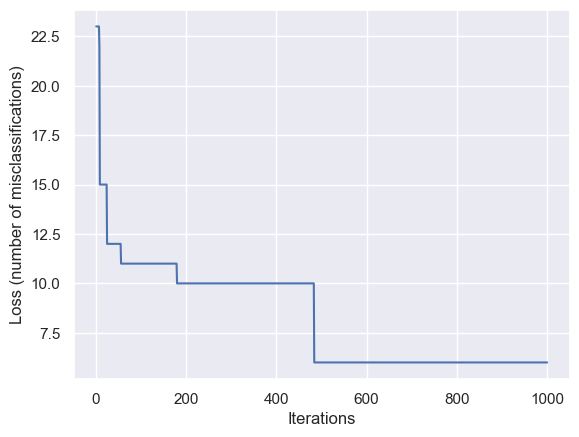

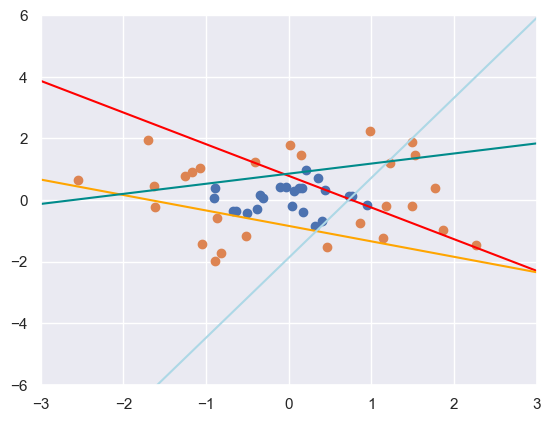

In [91]:
np.random.seed(42)
n_iterations = 1000
losses = np.empty(n_iterations)
for n in range(n_iterations):
    # Sample proposal
    proposal = np.random.uniform(low=-3, high=3, size=12)
    loss = loss_function(proposal)

    # Accept on first iteration
    if n == 0:
        weights = proposal
        losses[n] = loss
        continue

    # Check whether loss is lower than for previous parameters
    isProposalAccepted = loss < losses[n-1]
    if isProposalAccepted:
        weights = proposal
        losses[n] = loss
    else:
        # We did not accept, so loss remains the same
        losses[n] = losses[n-1]


# Visualise loss over time
iterations = np.arange(1, n_iterations+1)
plt.plot(iterations, losses)
plt.xlabel('Iterations')
plt.ylabel('Loss (number of misclassifications)')
plt.show()

# Visualise the learned classification
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

x1 = np.linspace(-3, 3, 100)
x2 = -(weights[1] * x1 + weights[0]) / weights[2]
plt.plot(x1, x2, linestyle='-', color='red')
x2 = -(weights[4] * x1 + weights[3]) / weights[5]
plt.plot(x1, x2, linestyle='-', color='orange')
x2 = -(weights[7] * x1 + weights[6]) / weights[8]
plt.plot(x1, x2, linestyle='-', color='lightblue')
x2 = -(weights[10] * x1 + weights[9]) / weights[11]
plt.plot(x1, x2, linestyle='-', color='darkcyan')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()

That is amazing! Our neural network learned to classify most of the data points all by itself! Why do you think did it not manage to classify all points perfectly?

# 4 Other activation functions for better training

In the above example, we trained a neural network using a simple optimisation algorithm that randomly samples weights from a distribution. This optimiser is guaranteed to evenutally find the optimal set of model parameters for our objective, the only problem is that it can take a veeeery large number of iterations to randomly sample this set of model parameters from the distribution. Common practice is therefore to use more advanced optimisers that take more information from the loss function into account to solve the optimisation task.

The most popular among those optimisers is the gradient descent (GD) algorithm which uses local derivatives of the loss function to step into the direction of its steepest descent. We will use pre-implemented versions of the GD algorithm in the remainder of this workshop.

However, before we do so, we still have one amendment to make to the action functions that we have used so far. Can you think of the reason why? 

### Task 6: Why will a GD algorithm not be able to optimise our neural network?

Look at the visualisation of the activation function below and discuss in your group why the GD algorithm might struggle to optimise networs with this activation function.

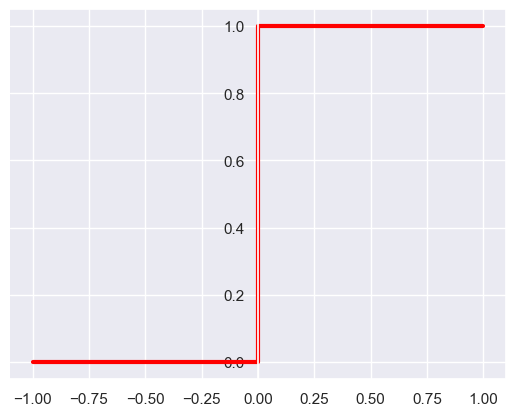

In [109]:
x = [-1, 0, 1]
y = [0, 0, 1]

fig, ax = plt.subplots()
ax.step(x, y, color='red', linewidth=3)

# Move the y-axis ticks to the center
ax.spines['left'].set_position('center')
plt.show()

Hint: How does the output of the activation function change for different inputs? And what does that mean for the gradients of the loss function?

### Task 7: Execute the cell below and use the slider in the figure to visualise how the gradient changes.

In [112]:
def step_function(x):
    return np.where(x > 0, 1, 0)

def step_function_gradient(x):
    return 0

# Define the function to plot
def plot_sine(delta_z):
    my_dpi = 192
    fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
    outer = gridspec.GridSpec(1, 2, hspace=0.6)

    # Create axes
    axes = []
    axes.append(plt.Subplot(fig, outer[0]))
    axes.append(plt.Subplot(fig, outer[1]))

    # Add axes to figure
    for ax in axes:
        fig.add_subplot(ax)

    # plot step function
    x = [-0.55, 0, 0.45]
    y = [0, 0, 1]
    axes[0].step(x, y, color='black', linewidth=3)
    axes[1].plot(x, [0, 0, 0], color='black', linewidth=3)

    # plot the starting point
    z0 = -0.05
    z = z0 + delta_z
    axes[0].plot(z0, step_function(z0), 'ro', markerfacecolor='none')
    axes[0].text(z0, step_function(z0) - 0.2, rf'$z_0 = {z0}$', fontsize=12, ha='center')
    axes[1].plot(z0, step_function_gradient(z0), 'ro', markerfacecolor='none')
    axes[1].text(z0, step_function_gradient(z0) - 0.2, rf'$z_0 = {z0}$', fontsize=12, ha='center')

    # plot the moving point
    axes[0].plot(z, step_function(z), 'ro')
    axes[0].text(z, step_function(z) + 0.2, rf'$z = z_0 + \Delta z = {z:.2f}$', fontsize=12, ha='right')
    axes[1].plot(z, step_function_gradient(z), 'ro')
    axes[1].text(z, step_function_gradient(z) + 0.2, rf'$z = z_0 + \Delta z = {z:.2f}$', fontsize=12, ha='right')

    axes[0].set_ylim([-1, 2])
    axes[0].set_xlabel(r'$z = \mathbf{w \cdot x}$')
    axes[0].set_ylabel(r'$f(z)$')
    axes[0].set_title('Output of perceptron')

    axes[1].set_ylim([-1, 2])
    axes[1].set_xlabel(r'$z = \mathbf{w \cdot x}$')
    axes[1].set_ylabel(r'$\partial f(z) / \partial w_j$')
    axes[1].set_title('Gradient of perceptron')
    plt.show()

# Create the slider
slider = FloatSlider(min=-0.15, max=0.5, step=0.01, value=0)

# Create the interactive plot
func = interact(plot_sine, delta_z=slider)

interactive(children=(FloatSlider(value=0.0, description='delta_z', max=0.5, min=-0.15, step=0.01), Output()),…

The gradient of the activation function with respect to the model weights is zero everywhere (and infinite at z = 0)! As a result, also the gradient of the loss function with respect to the weights is zero everywhere. This makes the use of the GD algorithm for our network impossible.

### 4.1 The sigmoid activation function

To avoid this "vanishing gradients" problem, it is common to use other activation functions to improve the efficiency of the training of neural networks. One of those activation functions is the sigmoid activation function illustrated below.

In [122]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

# Define the function to plot
def plot_sine(delta_z):
    my_dpi = 192
    fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
    outer = gridspec.GridSpec(1, 2, hspace=0.6)

    # Create axes
    axes = []
    axes.append(plt.Subplot(fig, outer[0]))
    axes.append(plt.Subplot(fig, outer[1]))

    # Add axes to figure
    for ax in axes:
        fig.add_subplot(ax)

    # Plot reference
    x = np.linspace(-20, 20, 100)
    axes[0].plot(x, sigmoid(x), color='black', linewidth=3)
    axes[1].plot(x, sigmoid_gradient(x), color='black', linewidth=3)

    # plot the starting point
    z0 = -5
    z = z0 + delta_z
    axes[0].plot(z0, sigmoid(z0), 'ro', markerfacecolor='none')
    axes[0].text(z0, sigmoid(z0) - 0.2, rf'$z_0 = {z0}$', fontsize=12, ha='center')
    axes[1].plot(z0, sigmoid_gradient(z0), 'ro', markerfacecolor='none')
    axes[1].text(z0, sigmoid_gradient(z0) + 0.02, rf'$z_0 = {z0}$', fontsize=12, ha='center')

    # plot the moving point
    axes[0].plot(z, sigmoid(z), 'ro')
    axes[0].text(z, sigmoid(z) + 0.2, rf'$z = z_0 + \Delta z = {z:.2f}$', fontsize=12, ha='right')
    axes[1].plot(z, sigmoid_gradient(z), 'ro')
    axes[1].text(z, sigmoid_gradient(z) + 0.02, rf'$z = z_0 + \Delta z = {z:.2f}$', fontsize=12, ha='right')

    axes[0].set_ylim([-0.5, 1.5])
    axes[0].set_title(rf'Impact of changing $z$ on activation')
    plt.show()

# Create the slider
slider = FloatSlider(min=-7, max=15, step=0.1, value=0)

# Create the interactive plot
func = interact(plot_sine, delta_z=slider)

interactive(children=(FloatSlider(value=0.0, description='delta_z', max=15.0, min=-7.0), Output()), _dom_class…

The sigmoid activation function is almost exactly the same as the step activation function that we have used before, the only differences is that the change from an output equal to 0 to an output equal to 1 now happens smoothly, avoiding the vashing gradrients (at least for z-values close to 0). Formally, the sigmoid activation can be written as

$$
a = \sigma (z) = \frac{1}{1 + e^{-z}}.
$$

In modern neural networks, many other activation functions are also used. Below we just show a random selection of these activation functions.

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$
$$
\frac{d}{dx}\tanh(x) = 1 - \tanh^2(x)
$$
$$
\text{Swish}(x) = x \cdot \frac{1}{1 + e^{-\beta x}}
$$
$$
\text{ELU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha (e^x - 1), & \text{otherwise} \end{cases}
$$

### Task 8: Train the neural network using the GD algorithm

Below, we have prepared an implementation of our neural networks using PyTorch (one of the most popular deep learning frameworks in Python). Execute the cell, and compare the result obtained with the GD optimiser to the previously obtained classifier.

In [289]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs=2, n_perceptrons=4):
        super(NeuralNetwork, self).__init__()
        self.layer = nn.Linear(n_inputs, n_perceptrons, dtype=torch.float64)

    def forward(self, x):
        y = F.sigmoid(self.layer(x))

        mask = torch.any(y >= 0.5, axis=1)
        y = torch.mean(y, axis=1)
        y[mask] += 0.3  # Bias towards higher numbers because one perceptron classified as "1"

        return y

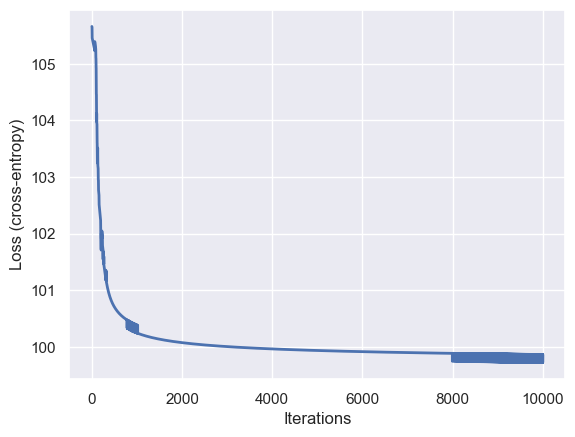

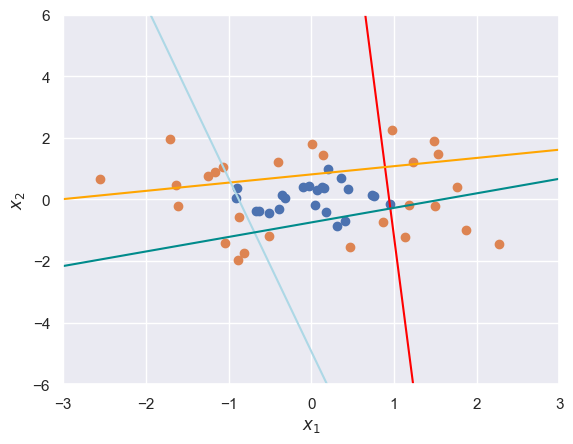

In [290]:
# Set up optimisation
model = NeuralNetwork()
objective_function = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=0.1)

# We regenerate the data, just in case X was overwritten
np.random.seed(0)
n_samples = 50
X = np.random.randn(n_samples, 2)
y = np.zeros(n_samples)
y[np.linalg.norm(X, axis=1) > 1] = 1
inputs = torch.tensor(X)
labels = torch.tensor(y)

# Run optimisation
losses = []
n_iterations = 10000
for epoch in range(n_iterations):
    # Reset the parameter gradients
    optimiser.zero_grad()

    # Simulation, evaluation and parameter proposal
    outputs = model(inputs)
    loss = objective_function(outputs, labels)
    loss.backward()
    optimiser.step()

    losses.append(loss.detach().numpy())

# Visualise loss over time
iterations = np.arange(1, n_iterations+1)
plt.plot(iterations, losses, linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (cross-entropy)')
plt.show()

# Visualise the learned classification
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# Reshape model weights
weights = np.empty(12)
bias = model.layer.bias.detach().numpy()
weights = model.layer.weight.detach().numpy()

x1 = np.linspace(-3, 3, 100)
x2 = -(weights[0, 0] * x1 + bias[0]) / weights[0, 1]
plt.plot(x1, x2, linestyle='-', color='red')
x2 = -(weights[1, 0] * x1 + bias[1]) / weights[1, 1]
plt.plot(x1, x2, linestyle='-', color='orange')
x2 = -(weights[2, 0] * x1 + bias[2]) / weights[2, 1]
plt.plot(x1, x2, linestyle='-', color='lightblue')
x2 = -(weights[3, 0] * x1 + bias[3]) / weights[3, 1]
plt.plot(x1, x2, linestyle='-', color='darkcyan')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

Number of incorrectly classified points:

In [291]:
mask0 = y == 0
mask1 = y == 1
y_pred = model(inputs).detach().numpy()
np.sum(1 - np.round(y_pred[mask1])) + np.sum(np.round(y_pred[mask0]))

2.0

## The multi-layer perceptron (MLP)

<span style="color: red;">TODO:</span> 

A multi-layer perceptron network has the same general structure:

<img src="multi_layer_perceptron_network.avif" width="700" style="display: block; margin: 0 auto">

The above diagram is also known as a **fully-connected network** because every neuron is connected to every other neuron. This does not have to be the case, which we will demonstrate later.

*TODO: change the image to label w_11 etc*

# 4. Neural Network

Now we have a neural network that uses the sigmoid activation function.
What shall we do with all this power?

## 4.1 MNIST Handwritten Digit Recognition

This is a classic problem for neural networks. 

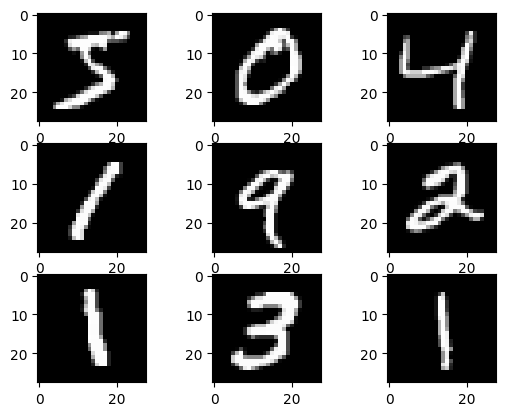

In [7]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

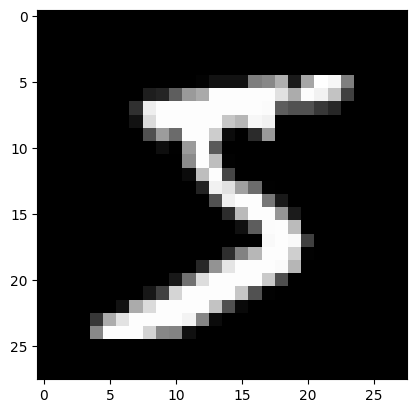

In [8]:
pyplot.imshow(X_train[0], cmap=pyplot.get_cmap('gray'))

Each digit has been binarised and rescaled into an image roughly 20x20 pixels, which is centred in a larger image of 28x28 pixels.

We want to develop a neural network where it takes one of these images as input. The idea is to have the neural network have a high activation/output for the digit that it thinks the input corresponds to, and a low output for all the other digits.

<img src="mnist_digit_recognition_network.png" width="500" style="display: block; margin: 0 auto; background-color: white">

In Section 3, we introduced the idea of finding the parameters of the network by starting with a random set and adjusting them to get to the desired activation.
How do we change the weights and biases in such a way that our activations/outputs end up approaching the desired activations? 
This is the process of training.

The key to any network is lots of training data - the more the better.
The training data in this case is pairs out inputs and outputs, labels by users/experts, which are converted to the desired activation.

<img src="inputs_labels_activations.png" width="500" style="display: block; margin: 0 auto">

1. Initialise the weights and biases of network with random values.
2. Compute network activation (output) for each training image.
This is just a feed forward process: for each image, run it through the network and get an activation and the output.
3. Compute the cost for the entire training data.
By doing this you get an activation for each training image, not the desired activation. We see the activation that this particular instance of the network is going to give you.
Using all these activations, you can compute the cost for the entire training data.
The weaker the performance of the network, the larger the cost.
Lower the cost, better the classification.
We're looking for the ws and bs that give us the minimum cost. We lower the cost, the classification improves and the performance of the network improves.

$$
C_x(\bold{w}, \bold{b}) = \Vert \hat{\underbar{a}}(\underbar{x}) - \underbar{a}(\underbar{x} | \underbar{w}, \underbar{b}) \Vert ^2
$$

$$
C(\bold{w}, \bold{b}) = \frac{1}{n} \sum_{x}C_x(\underbar{w}, \underbar{b})
$$

We average the cost because we don't want the cost to be a function of the number of images in the training data.

4. Update weights and biases using Gradient Descent.
Using the cost, we can adjust the weights and biases of the network using a method called Gradient Descent.
5. Repeat steps 2-4 until the cost reduces to an acceptable network, then you freeze the network.

<img src="training_process.png" width="1000" style="display: block; margin: 0 auto">

# 5. *Bonus:* Gradient Descent and the Backpropagation Algorithm

Step 4 of the training process described above uses Gradient Descent to move the parameters of the network such that the error decreases as training progresses.

If we knew the cost for all possible values of weights and biases, we would end up with a function like this:

<img src="gradient_descent.png" width="500" style="display: block; margin: 0 auto">

Then it would be easy to choose the best parameter values.
Since we don't live in this world, we have to use calculus to determine how to adjust the weights.